Importing libraries used for executions

In [2]:
!pip install opendatasets

In [216]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib as mpl
import shutil
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, BatchNormalization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC
from tensorflow.keras.metrics import SpecificityAtSensitivity
import tensorflow.keras as keras
from tensorflow.keras import regularizers
from keras.models import Sequential, load_model
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.utils import load_img
import random


In [39]:
dataset_path="DataSet/COVID-19_Radiography_Dataset"

# Input Data Preprocessing

Importing Input Dataset

In [40]:
def dataset_images_path(dataset_path):
  paths = []
  for directory, folder, filenames in os.walk(dataset_path):
      for filename in filenames:
          paths.append(os.path.join(directory, filename))
          
  return paths

In [43]:
images = dataset_images_path(dataset_path)
images = images[1:]
images

['DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-770.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1186.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1192.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-764.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-994.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-980.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-758.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1145.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1151.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-957.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1179.png',
 'DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-943.png',
 'DataSet/COVID-19_Radi

Printing an image before processing

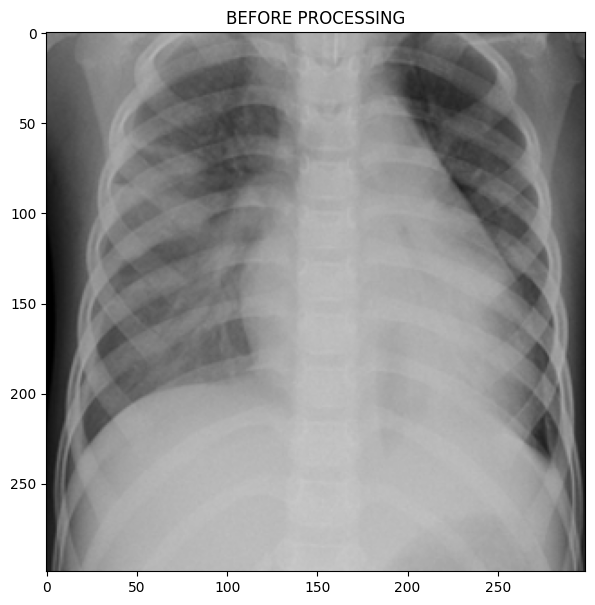

In [45]:
img = cv2.imread(images[0])
plt.figure(figsize=(7,7))
plt.title('BEFORE PROCESSING')
plt.imshow(img)
plt.show()

In [46]:
img_target_ht = 224
img_target_wd = 224

# Applying Histogram Equalization to all images

In [154]:
eq = (dataset_path+'/equalized_dataset')
# mkdir dataset_path+'equalized_dataset'
os.mkdir(eq)
os.mkdir(eq+'/Viral Pneumonia')
os.mkdir(eq+'/COVID')

In [155]:
dataset_new = "/equalized_dataset"

In [156]:
for directory, folder, filenames in os.walk(dataset_path):
    (os.path.join(dataset_new, directory))

In [157]:
path_before_img =""
path_after_img = ""
for directory, folder, filenames in os.walk(dataset_path):
      for filename in filenames:
        path = str(os.path.join(directory, filename))
        print("DIR ", directory.split('/')[-1])
        dir = directory.split('/')[-1]
        path_before_img = path
        img = cv2.imread(path)
        if not filename.startswith('.'):
            print(path)
            R, G, B = cv2.split(img)
            output1_R = cv2.equalizeHist(R)
            output1_G = cv2.equalizeHist(G)
            output1_B = cv2.equalizeHist(B)
            equ = cv2.merge((output1_R, output1_G, output1_B))
            image_after_processing = eq+ "/" + dir + "/"+  str(filename)
            path_after_img = eq+ "/" + dir +  "/"+str(filename)
            cv2.imwrite(image_after_processing, equ)

DIR  COVID-19_Radiography_Dataset
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-770.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-770.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1186.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1186.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1192.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1192.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-764.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-764.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-994.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral 

DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-639.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-639.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-177.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-177.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-611.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-611.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-605.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-605.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-163.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-163.png
DIR  Viral Pneumonia
DataS

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-377.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-377.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-411.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-411.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-405.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-405.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-363.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-363.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-439.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-439.png
DIR  

DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1147.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1147.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-969.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-969.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1153.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1153.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-996.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-996.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-982.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-982.png
DIR  Viral Pneumonia
D

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-830.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-830.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-603.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-603.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-165.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-165.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-171.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-171.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-617.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-617.png
DIR  

DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-211.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-211.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-205.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-205.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-563.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-563.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-588.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-588.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1342.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1342.png
DIR  Viral Pneumonia
Dat

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-210.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-210.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-238.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-238.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1155.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1155.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1141.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1141.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-947.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-947.png
D

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-115.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-115.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1085.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1085.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-883.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-883.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-897.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-897.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-129.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-129.png
DIR

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-921.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-921.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-935.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-935.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1133.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1133.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1127.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1127.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-909.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-909.png
D

------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-857.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-843.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-843.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-842.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-842.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1078.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1078.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-856.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-856.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1050.png
--

DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-932.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-932.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1134.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1134.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1120.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1120.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-259.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-259.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-265.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-265.png
DIR  Viral Pneumonia
D

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1082.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1082.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-112.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-112.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-884.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-884.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-890.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-890.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-648.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-648.png
DIR

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1335.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1335.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-98.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-98.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-448.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-448.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-306.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-306.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1296.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1296.png
DIR

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1240.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1240.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1254.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1254.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-7.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-7.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-66.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-66.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1268.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1268.png
DIR  

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-444.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-444.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-80.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-80.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-322.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-322.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-336.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-336.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-94.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-94.png
DIR  Vira

DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-337.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-337.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-451.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-451.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-95.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-95.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-81.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-81.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-445.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-445.png
DIR  Viral Pneumonia
DataSet/C

DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-490.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-490.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-54.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-54.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1266.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1266.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1272.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1272.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-40.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-40.png
DIR  Viral Pneumonia
DataS

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1307.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1307.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-297.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-297.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-283.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-283.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1313.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1313.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-268.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-268.png
D

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-668.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-668.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-654.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-654.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-132.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-132.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-126.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-126.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-640.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-640.png
DIR  

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-523.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-523.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-279.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-279.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1100.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1100.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1114.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1114.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-912.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-912.png
D

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-858.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-858.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-680.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-680.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1076.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1076.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1062.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1062.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-694.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-694.png
D

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-736.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-736.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-989.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-989.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-751.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-751.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-745.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-745.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-779.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-779.png
DIR  

------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-181.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-618.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-618.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-156.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-156.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-630.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-630.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-624.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-624.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-142.png
-----

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-544.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-544.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-550.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-550.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-236.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-236.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-578.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-578.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-587.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-587.png
DIR  

------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1210.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1204.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1204.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-394.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-394.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-36.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-36.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-419.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-419.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-425.png
----

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-421.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-421.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1228.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1228.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-32.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-32.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-390.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-390.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1200.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1200.png
DIR

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-226.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-226.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-568.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-568.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-795.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-795.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1163.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1163.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1177.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1177.png
D

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-813.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-813.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-185.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-185.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1015.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1015.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1001.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1001.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-191.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-191.png
D

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1192.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1192.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-764.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-764.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-994.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-994.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-980.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-980.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-758.png
------
DataSet

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-177.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-177.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-611.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-611.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-605.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-605.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-163.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-163.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-28.png
------
DataSet/COVID-19_Radiography_Da

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-565.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-565.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-571.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-571.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-217.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-217.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-559.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-559.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1344.png
------
DataSet/

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-410.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-410.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1345.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1345.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-558.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-558.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-570.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-570.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-216.png
------
DataSet/COVID-19_Radiography

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-399.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-399.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-13.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-13.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1221.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1221.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1235.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1235.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-158.png
------
DataSet/COVID-19_Radiography

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-788.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-788.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-944.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-944.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-777.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-777.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1181.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1181.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1195.png
------
DataSe

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-826.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-826.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-832.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-832.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1034.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1034.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1020.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1020.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1021.png
------
DataSet/COVID-19_Radiogra

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1126.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1126.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-908.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-908.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1132.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1132.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-934.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-934.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-920.png
------
DataSet/COVID-19_Radiograp

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-841.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-841.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-869.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-869.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1047.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1047.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1053.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1053.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-896.png
------
DataS

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-710.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-710.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-738.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-738.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1131.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1131.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1125.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1125.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-923.png
------
DataS

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1050.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1050.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1044.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1044.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-881.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-881.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-659.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-659.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-895.png
------
DataS

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1108.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1108.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-932.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-932.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1134.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1134.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1120.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1120.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-259.png
------
DataSet/COVID-19_Radiogr

------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-106.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1096.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1096.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-660.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-660.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-674.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-674.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1082.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1082.png
DIR  Viral Pneumonia
DataSe

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-528.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-528.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-272.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-272.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-514.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-514.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-500.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-500.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-266.png
------
DataSet/C

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-111.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-111.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-677.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-677.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-663.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-663.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-105.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-105.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1095.png
------
DataSet/

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-915.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-915.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-901.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-901.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-530.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-530.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-256.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-256.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-242.png
------
DataSet/COVID-19_Radiography_D

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-690.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-690.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-848.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-848.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1066.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1066.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1072.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1072.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-684.png
------
DataS

------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-731.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-719.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-719.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1110.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1110.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1104.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1104.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-902.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-902.png
DIR  Viral Pneumonia
DataSe

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-862.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-862.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-863.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-863.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1059.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1059.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-877.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-877.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-687.png
------
DataSet

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-718.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-718.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-730.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-730.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-724.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-724.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-708.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-708.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-720.png
------
DataSet/COVID-19_Radiography_D

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-697.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-697.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1061.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1061.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1075.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1075.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-683.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-683.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1074.png
------
DataSet/COVID-19_Radiogra

------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-906.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1128.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1128.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-735.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-735.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-721.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-721.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-709.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-709.png
DIR  Viral Pneumonia
DataSet/

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-858.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-858.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-680.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-680.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1076.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1076.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1062.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1062.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-694.png
------
DataSet/COVID-19_Radiograp

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1117.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1117.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-939.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-939.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1103.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1103.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-905.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-905.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-911.png
------
DataSet/COVID-19_Radiograp

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1004.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1004.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-194.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-194.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-802.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-802.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1038.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1038.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-816.png
------
DataSet/COVID-19_Radiograp

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-750.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-750.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-988.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-988.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-746.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-746.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-752.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-752.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1198.png
------
DataSet/

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-814.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-814.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1012.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1012.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-182.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-182.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-828.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-828.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-196.png
------
DataSet

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-757.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-757.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-964.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-964.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-970.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-970.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1176.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1176.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-780.png
------
DataSet/COVID-19_Radiography

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-805.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-805.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-811.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-811.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-622.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-622.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-144.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-144.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-150.png
------
DataSet/COVID-19_Radiography_D

DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-797.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-797.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-783.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-783.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1175.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1175.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-218.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-218.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-556.png
------
DataSet/COVID-19_Radiography

DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-147.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-147.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-621.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-621.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-609.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-609.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-1202.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral PneumoniaViral Pneumonia-1202.png
DIR  Viral Pneumonia
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/Viral Pneumonia/Viral Pneumonia-392.png
------
DataSet

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2326.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2326.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-974.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-974.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-960.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-960.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2332.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2332.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2454.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2454.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-753.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-753.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1808.png
------
DataSet/COVID-19_Radiogr

------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-169.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1955.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1955.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2284.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2284.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-168.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-168.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2290.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2290.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1941.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1941.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1799.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1799.png
DIR  COVID
Data

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-785.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-785.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1606.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1606.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3011.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3011.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2469.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2469.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1160.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1160.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1174.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1174.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3005.png
------
DataSet/COVID-19_Radiography_Da

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-817.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-817.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2245.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2245.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2251.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2251.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1980.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1980.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-803.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-803.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1758.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1758.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2537.png
------
DataSet/COVID-19_Radio

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2907.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2907.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-355.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-355.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2734.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2734.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2052.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2052.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2046.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2046.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3358.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3358.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2720.png
------
DataSet/COVID-19_Rad

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-989.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-989.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-751.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-751.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-745.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-745.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-976.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-976.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2324.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2324.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2442.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2442.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2456.png
------
DataSet/COVID-19_Radiograp

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2240.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2240.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2526.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2526.png
DIR  COVID
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2532.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2532.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2254.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2254.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1985.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1985.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-806.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-806.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3162.png
------
DataSet/C

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1990.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1990.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2527.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2527.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-422.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-422.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-344.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-344.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2916.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2916.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2902.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2902.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-350.png
------
DataSet/COVID-19_Radiog

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2651.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2651.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2889.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2889.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1358.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1358.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3229.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3229.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2137.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2137.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-754.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-754.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-998.png
------
DataSet/COVID-19_Radi

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1819.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1819.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-742.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-742.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3559.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3559.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2647.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2647.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1428.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1428.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2121.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2121.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2135.png
------
DataSet/COVID-19_Radiography_Da

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-346.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-346.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-420.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-420.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-434.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-434.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-352.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-352.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2900.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2900.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2257.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2257.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3149.png
------
DataSet/COVID-19_Radiograp

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2849.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2849.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2691.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2691.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2685.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2685.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-569.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-569.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-26.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-26.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3216.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3216.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2108.png
------
DataSet/COVID-19_Radiogr

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2769.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2769.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3477.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3477.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1260.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1260.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1506.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1506.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-485.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-485.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3311.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3311.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3305.png
------
DataSet/COVID-19_Rad

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3304.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3304.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3462.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3462.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1275.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1275.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1261.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1261.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3476.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3476.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2768.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2768.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3310.png
------
DataSet/COVID-19_Radiography_

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1459.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1459.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-95.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-95.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2150.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2150.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2144.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2144.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-81.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-81.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2622.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2622.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2811.png
------
DataSet/COVID-19_Radiography_Dataset/

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1289.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1289.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-444.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-444.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2970.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2970.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-322.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-322.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-336.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-336.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2964.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2964.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-450.png
------
DataSet/COVID-19_Radiogra

------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-736.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2155.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2155.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-90.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-90.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2633.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2633.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3539.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3539.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2627.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2627.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-84.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-84.png
DIR  COVID
DataSet/CO

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2960.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2960.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-332.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-332.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-326.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-326.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2974.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2974.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-440.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-440.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2545.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2545.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2223.png
------
DataSet/COVID-19_Radiogr

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-864.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-864.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1059.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1059.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2550.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2550.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2544.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2544.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-870.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-870.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2222.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2222.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2975.png
------
DataSet/COVID-19_Radiography_Data

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3510.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3510.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-284.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-284.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1307.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1307.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2626.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2626.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3538.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3538.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1449.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1449.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-85.png
------
DataSet/COVID-19_Radiography_Data

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1846.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1846.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2397.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2397.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3089.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3089.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-735.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-735.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-721.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-721.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2142.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2142.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-87.png
------
DataSet/COVID-19_Radiogr

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1700.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1700.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-683.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-683.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3117.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3117.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2209.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2209.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1728.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1728.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-873.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-873.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2221.png
------
DataSet/COVID-19_Radio

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-922.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-922.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2370.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2370.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3085.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3085.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-711.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-711.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1692.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1692.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-705.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-705.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1686.png
------
DataSet/COVID-19_Radiogr

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3318.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3318.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2006.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2006.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1269.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1269.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2760.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2760.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2953.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2953.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3495.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3495.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1282.png
------
DataSet/COVID-19_R

------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-857.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-843.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-843.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1718.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1718.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2211.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2211.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2577.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2577.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1056.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1056.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1730.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1730.png
DIR  COVID
Data

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1491.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1491.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2173.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2173.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2615.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2615.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1308.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1308.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2601.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2601.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3279.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3279.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2167.png
------
DataSet/COVID-19_Radiography_

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3455.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3455.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2763.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2763.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2005.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2005.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1518.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1518.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2011.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2011.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2777.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2777.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3469.png
------
DataSet/COVID-19_R

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-667.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-667.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-673.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-673.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1928.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1928.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1096.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1096.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-115.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-115.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2574.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2574.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-840.png
------
DataSet/COVID-19_Radiography_Dataset

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-707.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-707.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2400.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2400.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1109.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1109.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-934.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-934.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2366.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2366.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3078.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3078.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2372.png
------
DataSet/COVID-19_Radio

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1333.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1333.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3524.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3524.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-99.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-99.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3242.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3242.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1455.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1455.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-72.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-72.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2809.png
------
DataSet/COVID-19_Radiograp

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-460.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-460.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-474.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-474.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2798.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2798.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2940.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2940.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3486.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3486.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-312.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-312.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1291.png
------
DataSet/COVID-19_Radiogr

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2605.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2605.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1318.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1318.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2611.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2611.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2177.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2177.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3269.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3269.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3241.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3241.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1456.png
------
DataSet/COVID-19_Radiography_

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-891.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-891.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1906.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1906.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-885.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-885.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1735.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1735.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3122.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3122.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1053.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1053.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1047.png
------
DataSet/COVID-19_Radiography_Data

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-271.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-271.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2823.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2823.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-259.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-259.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-70.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-70.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-64.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-64.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1325.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1325.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3532.png
------
DataSet/COVID-19_Radiography_D

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3019.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3019.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2307.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2307.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2313.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2313.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-941.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-941.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-799.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-799.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-8.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-8.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2475.png
------
DataSet/COVID-19_Radiography

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1550.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1550.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2071.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2071.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1578.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1578.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2717.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2717.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3409.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3409.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2703.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2703.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-389.png
------
DataSet/COVID-19_Radiography_D

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2299.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2299.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3187.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3187.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-175.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-175.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-161.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-161.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3193.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3193.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-607.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-607.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1784.png
------
DataSet/COVID-19_Radiogr

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-203.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-203.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2851.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2851.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3597.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3597.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2689.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2689.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-565.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-565.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-571.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-571.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2845.png
------
DataSet/COVID-19_Radiogr

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1625.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1625.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3032.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3032.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3026.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3026.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2338.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2338.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1631.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1631.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1157.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1157.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2476.png
------
DataSet/COVID-19_Radiography_

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-638.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-638.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1963.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1963.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1977.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1977.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3190.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3190.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-604.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-604.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1787.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1787.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-162.png
------
DataSet/COVID-19_Radiog

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-228.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-228.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-15.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-15.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2846.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2846.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3580.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3580.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1397.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1397.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-214.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-214.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-572.png
------
DataSet/COVID-19_Radiography_Dataset/e

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2315.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2315.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-947.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-947.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2473.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2473.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2467.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2467.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1608.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1608.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-953.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-953.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2301.png
------
DataSet/COVID-19_Radio

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-166.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-166.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1783.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1783.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-600.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-600.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3194.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3194.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-167.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-167.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3195.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3195.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-601.png
------
DataSet/COVID-19_Radiogra

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-946.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-946.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2314.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2314.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2472.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2472.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-950.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-950.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-788.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-788.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2302.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2302.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2464.png
------
DataSet/COVID-19_Radiogr

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-561.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-561.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2855.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2855.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3593.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3593.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-207.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-207.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1384.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1384.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-398.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-398.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2712.png
------
DataSet/COVID-19_Radiogr

DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3425.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3425.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1232.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1232.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1226.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1226.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3431.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3431.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2049.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2049.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3357.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3357.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1540.png
------
DataSet/COVID-19_R

DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3035.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3035.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1622.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1622.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-979.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-979.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1636.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-1636.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-3021.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-3021.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-2459.png
------
DataSet/COVID-19_Radiography_Dataset/equalized_dataset/COVIDCOVID-2459.png
DIR  COVID
DataSet/COVID-19_Radiography_Dataset/COVID/COVID-1150.png
------
DataSet/COVID-19_Radiography_Da

In [166]:
images_after_hist_equal = dataset_images_path(eq+'/'+'COVID'+'/')
print(eq)

DataSet/COVID-19_Radiography_Dataset/equalized_dataset


Printing image after Histogram Equalization

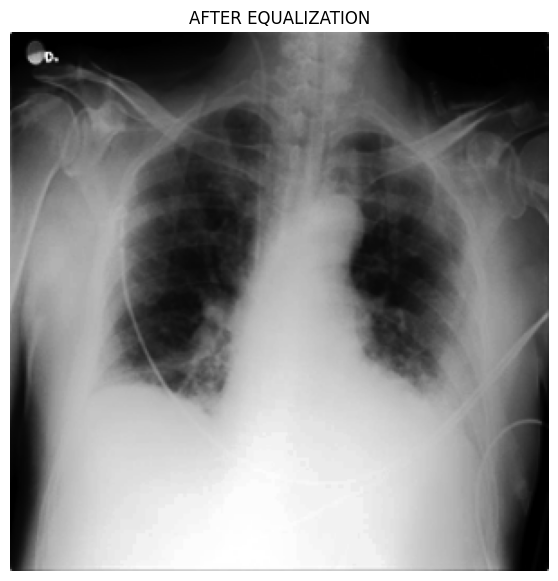

In [167]:
img = cv2.imread(path_before_img)
plt.figure(figsize=(7,7))
img2 = cv2.imread(images_after_hist_equal[0])
plt.title("AFTER EQUALIZATION")
plt.imshow(img2)
plt.axis('off') 
plt.show()

# Creating Training and Testing Dataset using ImageDataGenerator

In [168]:
def modifyImageSizre(image):
   
   image[:, :, 0] = [(i - 127.5)/127.5 for i in image[:, :, 0]]
   image[:, :, 1] = [(i - 127.5)/127.5 for i in image[:, :, 1]]
   image[:, :, 2] = [(i - 127.5)/127.5 for i in image[:, :, 2]]
   

   return image
def generate_image_dataset(dataset_folder):
  datagen = ImageDataGenerator(rescale=None,preprocessing_function=modifyImageSizre, 
                               validation_split=0.2, horizontal_flip=True,
                               rotation_range = 2, shear_range = 0.02,
                               zoom_range = 0.02,zca_whitening=False, 
                               samplewise_center=True, 
                               samplewise_std_normalization= True)
  training_data = datagen.flow_from_directory(
      dataset_folder,
      target_size=(img_target_ht, img_target_wd),
      batch_size=32,
      class_mode='categorical',
      shuffle=True,
      subset='training')

  validation_data = datagen.flow_from_directory(
      dataset_folder, 
      target_size=(img_target_ht, img_target_wd),
      batch_size= 32,
      shuffle=True,
      class_mode='categorical',
      subset='validation')
  return [training_data, validation_data]

In [170]:
METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall')
]

Compiling the DenseNet Model

In [171]:
def compile(model):
  learning_rate = 0.00001
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss='binary_crossentropy', metrics=METRICS)

In [182]:
from keras.callbacks import EarlyStopping, TensorBoard
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="./logs")
earlyStopping = EarlyStopping(monitor = 'val_loss', patience = 70, mode = 'min', restore_best_weights = True)

Initializing the DenseNet Model

In [193]:
def fit_model(model):
  trained_model = model.fit(training_data, validation_data=validation_data, epochs=65, batch_size = 32, callbacks=[earlyStopping])
  return trained_model

In [194]:
print(eq)
print(dataset_new)
print(dataset_path)

print(os.path.join(dataset_path,dataset_new))

[training_data, validation_data] = generate_image_dataset(eq)


DataSet/COVID-19_Radiography_Dataset/equalized_dataset
/equalized_dataset
DataSet/COVID-19_Radiography_Dataset
/equalized_dataset
Found 3969 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


Printing an image from Training Dataset

In [195]:
def printImage(resultData):
    x = resultData.next() #fetch the first batch
    a = x[0] # train data
    b = x[1] # train label
    plt.figure(figsize=(7,7))
    plt.imshow(a[0])
    plt.title("PREPROCESSED IMAGE: "+str(b[0]))
    plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


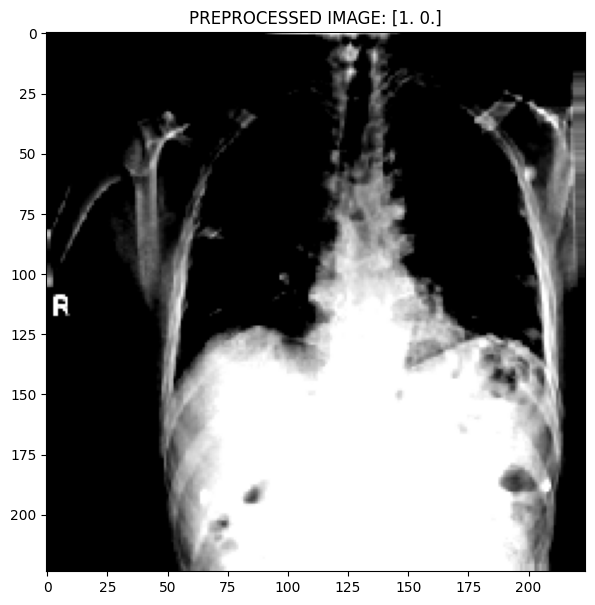

In [196]:
printImage(training_data)

In [197]:
class_label = list(training_data.class_indices)

# Adding layers to the DenseNet Model and loading pre-trained weights

In [198]:
def create_model():
  densenet = keras.applications.densenet
  conv_model = densenet.DenseNet121(weights=None, include_top=False, pooling="avg", input_shape=(224,224,3))
  x = keras.layers.Dropout(0.3)(conv_model.output)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(64, activation='tanh',kernel_initializer=GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))(x)
  x = keras.layers.Dropout(0.3)(x)
  x = keras.layers.Dense(32, activation='tanh',kernel_initializer=GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001) ,kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))(x)
  x = keras.layers.Dropout(0.3)(x)
  x = keras.layers.Dense(16, activation='tanh',kernel_initializer=GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001) ,kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))(x)
  x = keras.layers.Dropout(0.3)(x)
  predictions = keras.layers.Dense(len(class_label), activation='softmax', kernel_initializer=GlorotNormal(), bias_regularizer=tf.keras.regularizers.L2(0.0001),kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))(x)
  densenet_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
  for layer in densenet_model.layers[:300]:
      layer.trainable = False
  for layer in densenet_model.layers[300:]:
      layer.trainable = True
  densenet_model.load_weights("brucechou1983_CheXNet_Keras_0.3.0_weights.h5", by_name = True, skip_mismatch = True)
  densenet_model.summary()
  return densenet_model

In [199]:
desnet = create_model()
compile(desnet)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                           

 conv2_block4_0_relu (Activatio  (None, 56, 56, 160)  0          ['conv2_block4_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block10_concat (Concaten  (None, 28, 28, 448)  0          ['conv3_block9_concat[0][0]',    
 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
          

                                                                                                  
 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block7_0_relu (Activatio  (None, 14, 14, 448)  0          ['conv4_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block15_2_conv[0][0]']   
                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_rel

 ization)                                                                                         
                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_blo

 conv5_block8_concat (Concatena  (None, 7, 7, 768)   0           ['conv5_block7_concat[0][0]',    
 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
          

 on)                                                                                              
                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

 dense_8 (Dense)                (None, 64)           65600       ['flatten_2[0][0]']              
                                                                                                  
 dropout_9 (Dropout)            (None, 64)           0           ['dense_8[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 32)           2080        ['dropout_9[0][0]']              
                                                                                                  
 dropout_10 (Dropout)           (None, 32)           0           ['dense_9[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 16)           528         ['dropout_10[0][0]']             
                                                                                                  
 dropout_1

Training the DenseNet Model

In [200]:
trained_model2 = fit_model(desnet)

Epoch 1/65


2022-12-07 22:03:32.128242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.7278 - tp: 3488.0000 - fp: 1570.0000 - tn: 3488.0000 - fn: 1570.0000 - accuracy: 0.6896 - precision: 0.6896 - recall: 0.6896

2022-12-07 22:04:17.248294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 61s 422ms/step - loss: 0.7278 - tp: 3488.0000 - fp: 1570.0000 - tn: 3488.0000 - fn: 1570.0000 - accuracy: 0.6896 - precision: 0.6896 - recall: 0.6896 - val_loss: 0.6065 - val_tp: 723.0000 - val_fp: 269.0000 - val_tn: 723.0000 - val_fn: 269.0000 - val_accuracy: 0.7288 - val_precision: 0.7288 - val_recall: 0.7288
Epoch 2/65
125/125 [==============================] - 46s 369ms/step - loss: 0.6489 - tp: 2877.0000 - fp: 1092.0000 - tn: 2877.0000 - fn: 1092.0000 - accuracy: 0.7249 - precision: 0.7249 - recall: 0.7249 - val_loss: 0.5927 - val_tp: 723.0000 - val_fp: 269.0000 - val_tn: 723.0000 - val_fn: 269.0000 - val_accuracy: 0.7288 - val_precision: 0.7288 - val_recall: 0.7288
Epoch 3/65
125/125 [==============================] - 46s 371ms/step - loss: 0.6211 - tp: 2900.0000 - fp: 1069.0000 - tn: 2900.0000 - fn: 1069.0000 - accuracy: 0.7307 - precision: 0.7307 - recall: 0.7307 - val_loss: 0.5864 - val_tp: 723.0000 - val_fp: 269.0000 - val_tn: 723.00

125/125 [==============================] - 46s 368ms/step - loss: 0.2899 - tp: 3691.0000 - fp: 278.0000 - tn: 3691.0000 - fn: 278.0000 - accuracy: 0.9300 - precision: 0.9300 - recall: 0.9300 - val_loss: 0.2738 - val_tp: 941.0000 - val_fp: 51.0000 - val_tn: 941.0000 - val_fn: 51.0000 - val_accuracy: 0.9486 - val_precision: 0.9486 - val_recall: 0.9486
Epoch 24/65
125/125 [==============================] - 46s 368ms/step - loss: 0.2740 - tp: 3729.0000 - fp: 240.0000 - tn: 3729.0000 - fn: 240.0000 - accuracy: 0.9395 - precision: 0.9395 - recall: 0.9395 - val_loss: 0.2600 - val_tp: 939.0000 - val_fp: 53.0000 - val_tn: 939.0000 - val_fn: 53.0000 - val_accuracy: 0.9466 - val_precision: 0.9466 - val_recall: 0.9466
Epoch 25/65
125/125 [==============================] - 46s 369ms/step - loss: 0.2585 - tp: 3759.0000 - fp: 210.0000 - tn: 3759.0000 - fn: 210.0000 - accuracy: 0.9471 - precision: 0.9471 - recall: 0.9471 - val_loss: 0.2382 - val_tp: 957.0000 - val_fp: 35.0000 - val_tn: 957.0000 - val_

Epoch 46/65
125/125 [==============================] - 46s 367ms/step - loss: 0.1178 - tp: 3897.0000 - fp: 72.0000 - tn: 3897.0000 - fn: 72.0000 - accuracy: 0.9819 - precision: 0.9819 - recall: 0.9819 - val_loss: 0.1003 - val_tp: 979.0000 - val_fp: 13.0000 - val_tn: 979.0000 - val_fn: 13.0000 - val_accuracy: 0.9869 - val_precision: 0.9869 - val_recall: 0.9869
Epoch 47/65
125/125 [==============================] - 46s 367ms/step - loss: 0.1127 - tp: 3912.0000 - fp: 57.0000 - tn: 3912.0000 - fn: 57.0000 - accuracy: 0.9856 - precision: 0.9856 - recall: 0.9856 - val_loss: 0.0936 - val_tp: 979.0000 - val_fp: 13.0000 - val_tn: 979.0000 - val_fn: 13.0000 - val_accuracy: 0.9869 - val_precision: 0.9869 - val_recall: 0.9869
Epoch 48/65
125/125 [==============================] - 46s 367ms/step - loss: 0.1099 - tp: 3912.0000 - fp: 57.0000 - tn: 3912.0000 - fn: 57.0000 - accuracy: 0.9856 - precision: 0.9856 - recall: 0.9856 - val_loss: 0.0938 - val_tp: 981.0000 - val_fp: 11.0000 - val_tn: 981.0000 

In [203]:
desnet.save('DensetNet_model.h5')

# DEMO : Executing the model with Testing Dataset

In [245]:
model = keras.models.load_model('SavedModel/DensetNet_model.h5')
Y_pred = model.predict(
            validation_data, batch_size = 32, verbose = 0, steps = validation_data.n//validation_data.batch_size)
y_pred = np.argmax(Y_pred ,  axis = 1)

2022-12-07 23:41:55.354285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# Result Metrics

Classification Report

In [246]:
y_true= validation_data.classes
print(classification_report(y_true,y_pred,target_names=['COVID','VIRAL PNEUMONIA']))

                 precision    recall  f1-score   support

          COVID       0.73      0.72      0.72       723
VIRAL PNEUMONIA       0.27      0.28      0.28       269

       accuracy                           0.60       992
      macro avg       0.50      0.50      0.50       992
   weighted avg       0.61      0.60      0.60       992

